# Using Supervised Learning to Predict a Future Chronic Heart Disease

## Introduction
    In this notebook, I will demonstrate how to utilize Supervised Machine Learning to predict if a patient is at risk for a future chronic heart disease. I will be using the Framingham Heart Study Dataset (https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset) that contains over 4,000 observations and 16 features (including the target variable, TenYearCHD). Using ML to be able to predict future heart diseases has an obvious upside, and automating this problem can provide health professionals with quick real-time information regarding their patient in order to provide the best care and treatment for the patient. This notebook will go through some basic Exploratory Data Analysis (EDA) procedures to give us quick insight into the dataset and its features. Then we will rapidly prototype three ML algorithms (Logistic Regression, Decision Tree Classifier, and Random Forest Classifier) and compare their results. 

## Basic Dependencies

In [715]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load Dataset

In [716]:
# Creating pandas dataframe
df = pd.read_csv('framingham.csv')

In [717]:
# View the first 10 observations
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [718]:
# View the shape of the dataframe
df.shape

(4238, 16)

In [719]:
# Further info regarding the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [720]:
# Further info regarding the dataframe
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [721]:
# creating a correlation matrix
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


#### Heatmap shows low correlation between target variable and the independent variables. Remember, this is a classification problem. Low correlation means there's no linear relationship; it doesn't mean there's no information in the feature that predicts the target.

<Axes: >

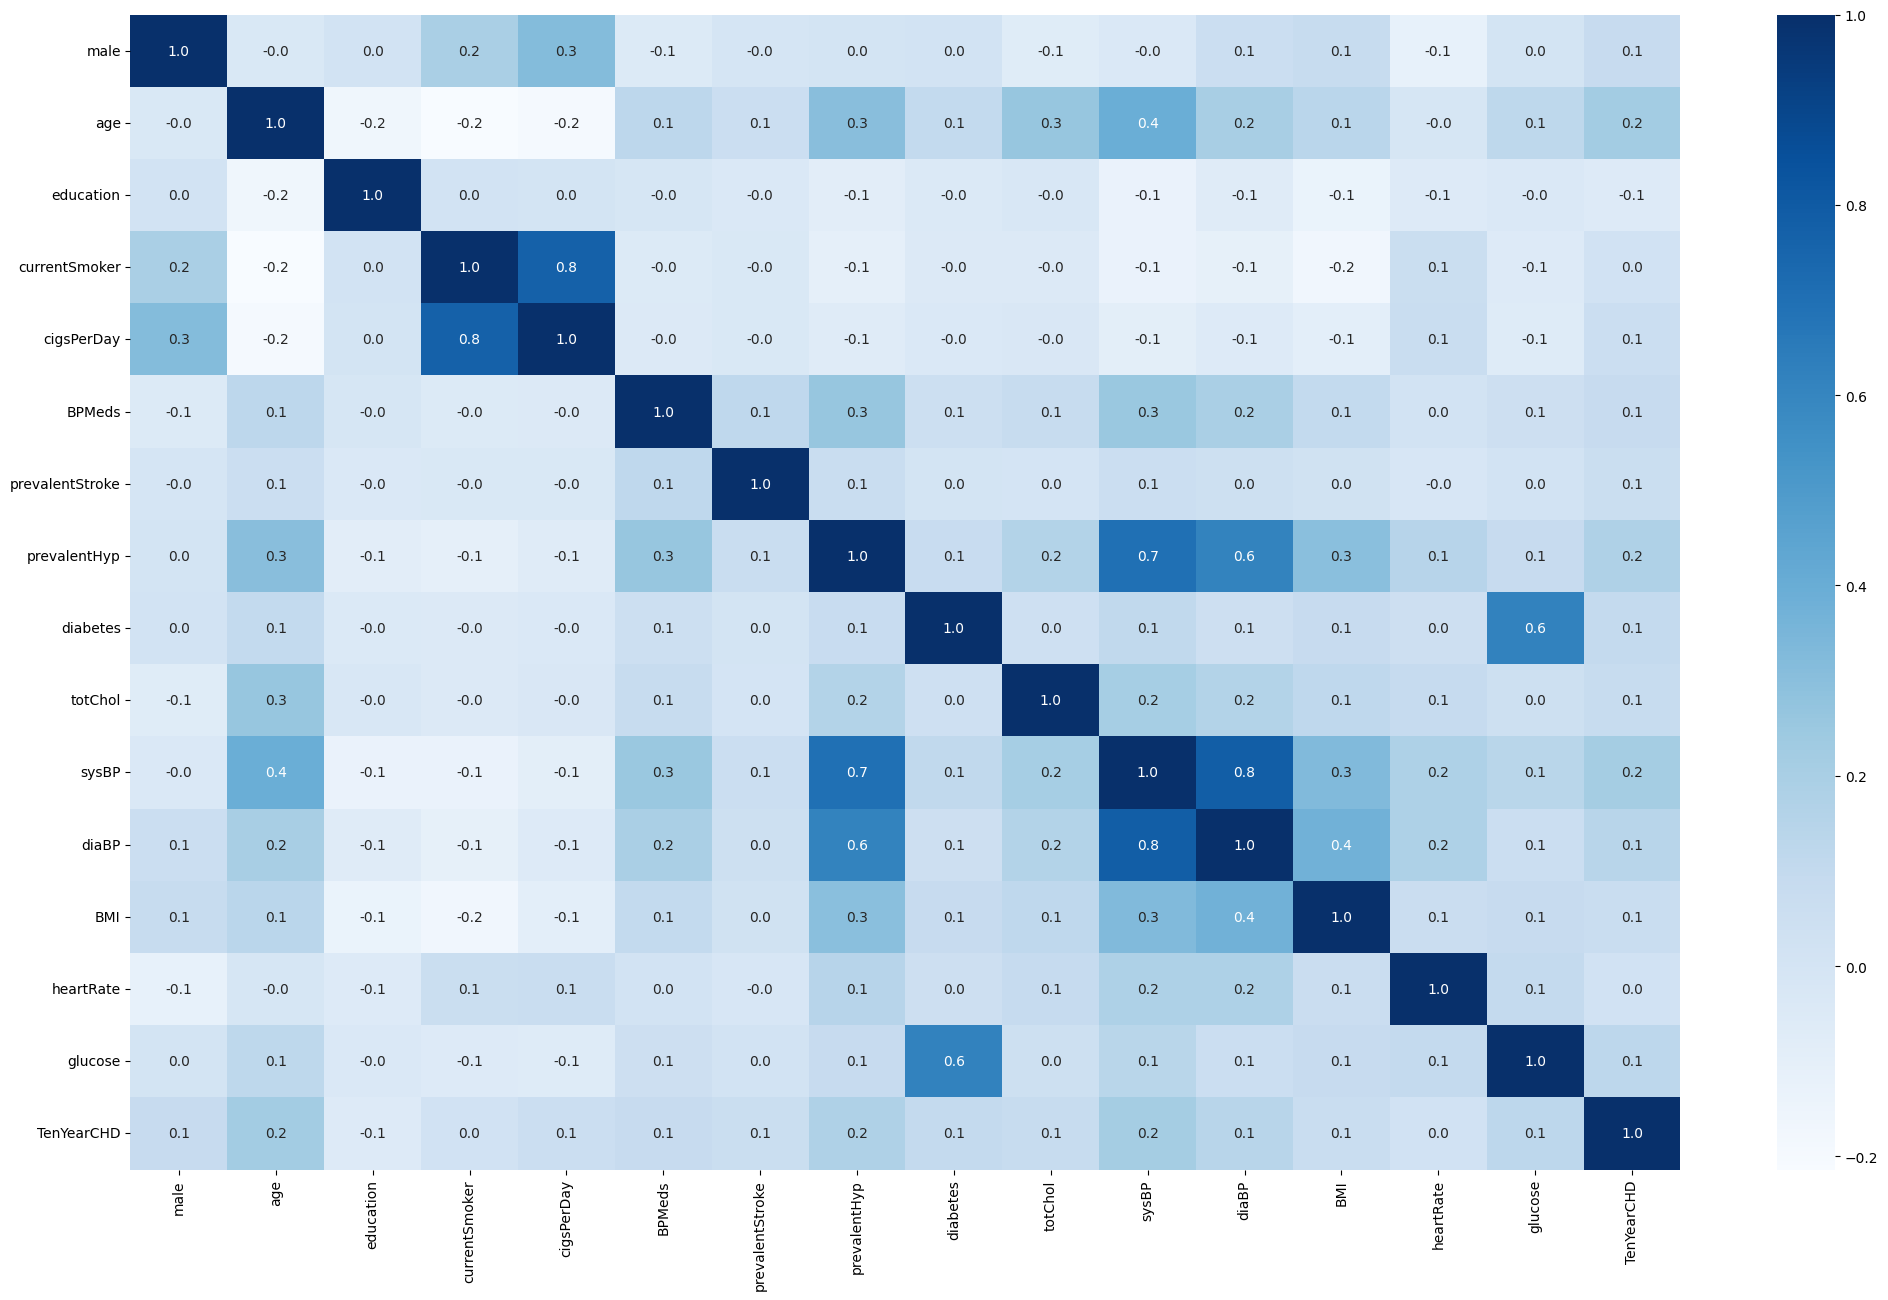

In [722]:
# Turning the correlation matrix into a heatmap
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt=".1f")

In [723]:
# Check if null values exist
df.isnull().values.any()

True

In [724]:
# check which features have null values and how many
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [725]:
# Understanding Null value population
n = df.shape[0]
null_percent_education = (105/n) * 100
null_percent_cigsPerDay = (29/n) * 100
null_percent_BPMeds = (53/n) * 100
null_percent_totChol = (50/n) * 100
null_percent_BMI = (19/n) * 100
null_percent_heartRate = (1/n) * 100
null_percent_glucose = (388/n) * 100

print('NaN/sample size for education: %', round(null_percent_education, 2), '\n' 
     'NaN/sample size for cigsPerDay: %', round(null_percent_cigsPerDay, 2), '\n'
     'NaN/sample size for BPMeds: %', round(null_percent_BPMeds, 2), '\n'
     'NaN/sample size for totChol: %', round(null_percent_totChol, 2), '\n'
     'NaN/sample size for BMI: %', round(null_percent_BMI, 2), '\n'
     'NaN/sample size for heartRate: %', round(null_percent_heartRate, 2), '\n'
     'NaN/sample size for glucose: %', round(null_percent_glucose, 2), '\n')

NaN/sample size for education: % 2.48 
NaN/sample size for cigsPerDay: % 0.68 
NaN/sample size for BPMeds: % 1.25 
NaN/sample size for totChol: % 1.18 
NaN/sample size for BMI: % 0.45 
NaN/sample size for heartRate: % 0.02 
NaN/sample size for glucose: % 9.16 



In [726]:
# Understanding Null value population

total_nan = df.isnull().sum().sum()
total_nan_rows = df.isnull().any(axis=1).sum()
nan_percent = (total_nan/n) * 100
nan_row_percent = (total_nan_rows/n) * 100
print(total_nan, "total nan values in the dataset")
print(total_nan_rows, 'total rows containing NaN')
# print('%',round(nan_percent, 2))
print("percentage rows with nan values: %", round(nan_row_percent, 2))

645 total nan values in the dataset
582 total rows containing NaN
percentage rows with nan values: % 13.73


### Handling NaN

In [727]:
# util
df = pd.read_csv('framingham.csv')

#### Method 1: Remove all rows with NaN value. 

In [728]:
# Drop all NaN values
df2 = df.dropna()

In [729]:
# Check new shape of dataframe
df2.shape[0]

3656

In [730]:
# Check if any NaN values still exist
df2.isnull().values.any()

False

In [731]:
# Check if any NaN values still exist

df2.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### Method 2: Using basic math (mean, mode)

In [732]:
# Creating new instance of the dataframe
df3 = df

In [733]:
# Check for null values 
df3.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [734]:
# Understanding the education data values
df3['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [735]:
# Using mode
df3['education'] = df3['education'].fillna(df3['education'].mode()[0])

In [736]:
# Understanding the cigsPerDay data values

df3['cigsPerDay'] = df3['cigsPerDay'].fillna(df3['cigsPerDay'].mean())

In [737]:
# Make sure there are no instances of 'not a current smoker' but also has cigsPerDay > 0
df3.loc[df3['currentSmoker'] == 0, 'cigsPerDay'].value_counts()

0.0    2144
Name: cigsPerDay, dtype: int64

In [738]:
# Understanding the BPMeds data values

df3['BPMeds'].value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

In [739]:
# Using mode

df3['BPMeds'] = df3['BPMeds'].fillna(df3['BPMeds'].mode()[0])

In [740]:
# Understanding the totChol data values

df3['totChol'].unique()

array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
       294., 332., 226., 221., 232., 291., 190., 185., 234., 215., 270.,
       272., 295., 209., 175., 214., 257., 178., 233., 180., 243., 237.,
        nan, 311., 208., 252., 261., 179., 194., 267., 216., 240., 266.,
       255., 220., 235., 212., 223., 300., 302., 248., 200., 189., 258.,
       202., 213., 183., 274., 170., 210., 197., 326., 188., 256., 244.,
       193., 239., 296., 269., 275., 268., 265., 173., 273., 290., 278.,
       264., 282., 241., 288., 222., 303., 246., 150., 187., 286., 154.,
       279., 293., 259., 219., 230., 320., 312., 165., 159., 174., 242.,
       301., 167., 308., 325., 229., 236., 224., 253., 464., 171., 186.,
       227., 249., 176., 163., 191., 263., 196., 310., 164., 135., 238.,
       207., 342., 287., 182., 352., 284., 217., 203., 262., 129., 155.,
       323., 206., 283., 319., 304., 340., 328., 280., 368., 218., 276.,
       339., 231., 198., 177., 201., 277., 184., 19

In [741]:
# Using mean

df3['totChol'] = df3['totChol'].fillna(df3['totChol'].mean())

In [742]:
# Understanding the BMI data values

df3['BMI'].describe()

count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [743]:
# Using mean

df3['BMI'] = df3['BMI'].fillna(df3['BMI'].mean())

In [744]:
# Understanding the heartRate data values

df3['heartRate'].unique()

array([ 80.,  95.,  75.,  65.,  85.,  77.,  60.,  79.,  76.,  93.,  72.,
        98.,  64.,  70.,  71.,  62.,  73.,  90.,  96.,  68.,  63.,  88.,
        78.,  83., 100.,  67.,  84.,  57.,  50.,  74.,  86.,  55.,  92.,
        66.,  87., 110.,  81.,  56.,  89.,  82.,  48., 105.,  61.,  54.,
        69.,  52.,  94., 140., 130.,  58., 108., 104.,  91.,  53.,  nan,
       106.,  59.,  51., 102., 107., 112., 125., 103.,  44.,  47.,  45.,
        97., 122., 120.,  99., 115., 143., 101.,  46.])

In [745]:
# Using mean

df3['heartRate'] = df3['heartRate'].fillna(df3['heartRate'].mean())

In [746]:
# Understanding the glucose data values

df3['glucose'].describe()

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [747]:
# Using mean

df3['glucose'] = df3['glucose'].fillna(df3['glucose'].mean())

In [748]:
# Check if any NaN values still exist

df3.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Visualize data

### Before df tuning

0    3594
1     644
Name: TenYearCHD, dtype: int64


([<matplotlib.patches.Wedge at 0x28629922bb0>,
 [Text(-0.9770160500999736, 0.5054103657890746, '0-No-CHD'),
  Text(0.9770160500999733, -0.5054103657890752, '1-CHD')],
 [Text(-0.5329178455090764, 0.2756783813394952, '84.80%'),
  Text(0.5329178455090763, -0.2756783813394955, '15.20%')])

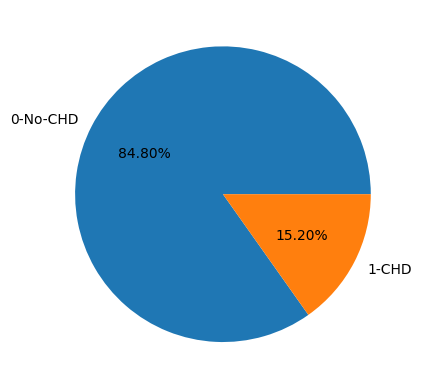

In [749]:
# Pie plot of CHD distribution

unique_counts = df['TenYearCHD'].value_counts()
print(unique_counts)

plt.pie(unique_counts.tolist(), 
        labels = ['0-No-CHD','1-CHD'],
        autopct='%1.2f%%'
       )

### After df tuning

0    3099
1     557
Name: TenYearCHD, dtype: int64


([<matplotlib.patches.Wedge at 0x2862bcc4850>,
 [Text(-0.976390016935594, 0.5066187272777337, '0-No-CHD'),
  Text(0.9763900643686583, -0.5066186358615002, '1-CHD')],
 [Text(-0.5325763728739603, 0.27633748760603655, '84.76%'),
  Text(0.5325763987465408, -0.27633743774263647, '15.24%')])

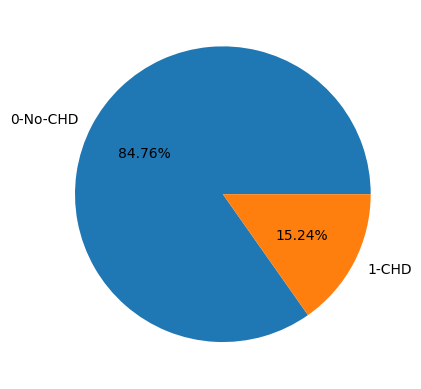

In [839]:
# Pie plot of CHD distribution

# Comment/uncomment one of next 2 lines to compare the 2 NaN handling methods
unique_counts = df2['TenYearCHD'].value_counts() 
# unique_counts = df3['TenYearCHD'].value_counts()

print(unique_counts)

plt.pie(unique_counts.tolist(), 
        labels = ['0-No-CHD','1-CHD'],
        autopct='%1.2f%%'
       )

#### Visualize the independent features

In [751]:
# df2['male'].value_counts()
df3['male'].value_counts()

0    2419
1    1819
Name: male, dtype: int64

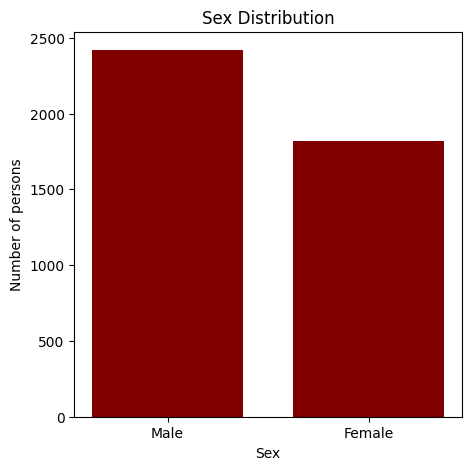

In [752]:
# sex = {'Male': 1622, 'Female': 2034}
sex = {'Male': 2419, 'Female': 1819}
fig = plt.figure(figsize=(5,5))
plt.bar(list(sex.keys()), list(sex.values()), color='maroon', width = 0.75)
plt.xlabel("Sex")
plt.ylabel("Number of persons")
plt.title('Sex Distribution')
plt.show()

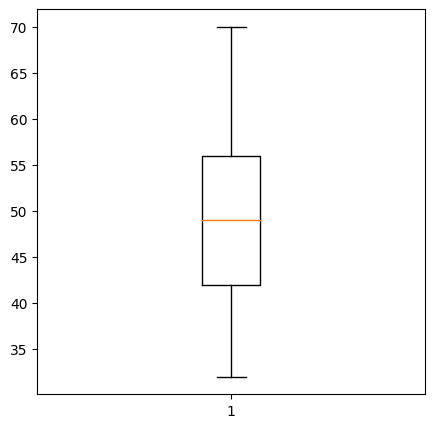

In [753]:
fig = plt.figure(figsize=(5,5))
# plt.boxplot(df2['age'])
plt.boxplot(df3['age'])

plt.show()

In [754]:
# df2['education'].value_counts()
df3['education'].value_counts()

1.0    1825
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

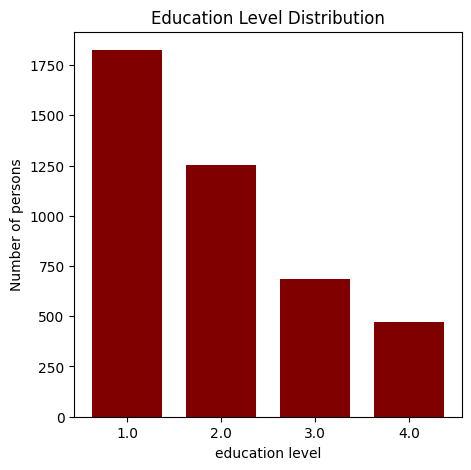

In [755]:
# education = {'1.0': 1526, '2.0': 1101, '3.0': 606 , '4.0': 423}
education = {'1.0': 1825, '2.0': 1253, '3.0': 687 , '4.0': 473}
fig = plt.figure(figsize=(5,5))
plt.bar(list(education.keys()), list(education.values()), color='maroon', width = 0.75)
plt.xlabel("education level")
plt.ylabel("Number of persons")
plt.title('Education Level Distribution')
plt.show()

In [756]:
# df2['currentSmoker'].value_counts()
df3['currentSmoker'].value_counts()

0    2144
1    2094
Name: currentSmoker, dtype: int64

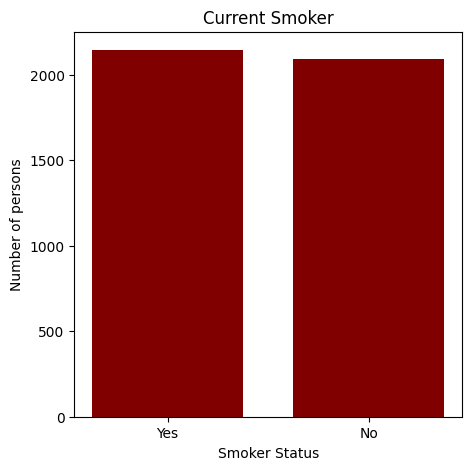

In [757]:
# smoker = {'Yes': 1788, 'No': 1868}
smoker = {'Yes': 2144, 'No': 2094}
fig = plt.figure(figsize=(5,5))
plt.bar(list(smoker.keys()), list(smoker.values()), color='maroon', width = 0.75)
plt.xlabel("Smoker Status")
plt.ylabel("Number of persons")
plt.title('Current Smoker')
plt.show()

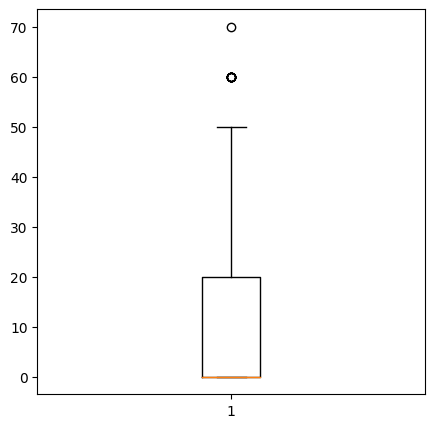

In [758]:
fig = plt.figure(figsize=(5,5))
# plt.boxplot(df2['cigsPerDay'])
plt.boxplot(df3['cigsPerDay'])
plt.show()

In [759]:
# df2['BPMeds'].value_counts()
df3['BPMeds'].value_counts()

0.0    4114
1.0     124
Name: BPMeds, dtype: int64

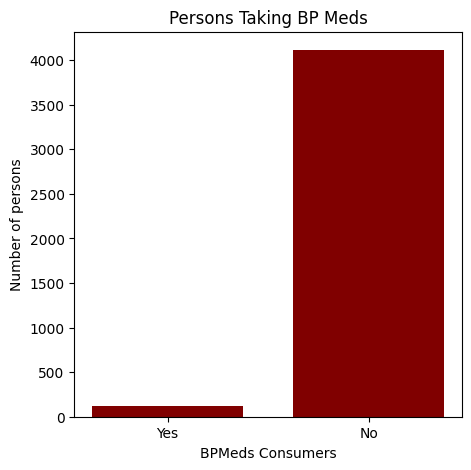

In [760]:
# bpmeds = {'Yes': 111, 'No': 3545}
bpmeds = {'Yes': 124, 'No': 4114}
fig = plt.figure(figsize=(5,5))
plt.bar(list(bpmeds.keys()), list(bpmeds.values()), color='maroon', width = 0.75)
plt.xlabel("BPMeds Consumers")
plt.ylabel("Number of persons")
plt.title('Persons Taking BP Meds')
plt.show()

In [761]:
# df2['prevalentStroke'].value_counts()
df3['prevalentStroke'].value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

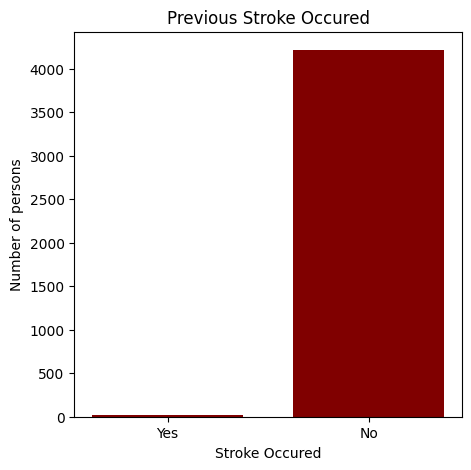

In [762]:
# stroke = {'Yes': 21, 'No': 3635}
stroke = {'Yes': 25, 'No': 4213}
fig = plt.figure(figsize=(5,5))
plt.bar(list(stroke.keys()), list(stroke.values()), color='maroon', width = 0.75)
plt.xlabel("Stroke Occured")
plt.ylabel("Number of persons")
plt.title('Previous Stroke Occured')
plt.show()

In [763]:
# df2['prevalentHyp'].value_counts()
df3['prevalentHyp'].value_counts()

0    2922
1    1316
Name: prevalentHyp, dtype: int64

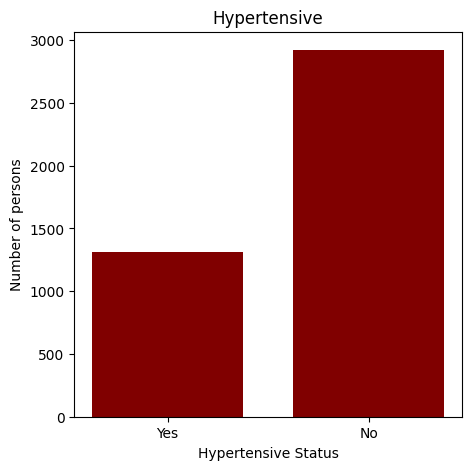

In [764]:
# hyp = {'Yes': 1139, 'No': 2517}
hyp = {'Yes': 1316, 'No': 2922}
fig = plt.figure(figsize=(5,5))
plt.bar(list(hyp.keys()), list(hyp.values()), color='maroon', width = 0.75)
plt.xlabel("Hypertensive Status")
plt.ylabel("Number of persons")
plt.title('Hypertensive')
plt.show()

In [765]:
# df2['diabetes'].value_counts()
df3['diabetes'].value_counts()

0    4129
1     109
Name: diabetes, dtype: int64

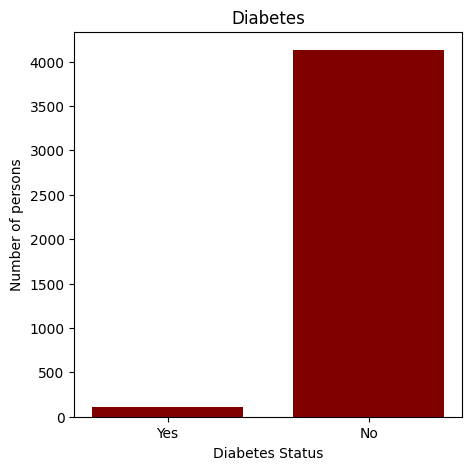

In [766]:
# diabetes = {'Yes': 99, 'No': 3557}
diabetes = {'Yes': 109, 'No': 4129}
fig = plt.figure(figsize=(5,5))
plt.bar(list(diabetes.keys()), list(diabetes.values()), color='maroon', width = 0.75)
plt.xlabel("Diabetes Status")
plt.ylabel("Number of persons")
plt.title('Diabetes')
plt.show()

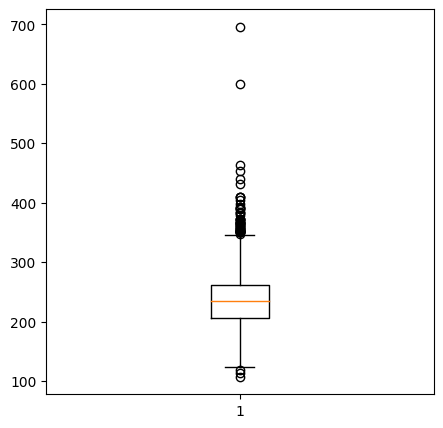

In [767]:
fig = plt.figure(figsize=(5,5))
# plt.boxplot(df2['totChol'])
plt.boxplot(df3['totChol'])
plt.show()

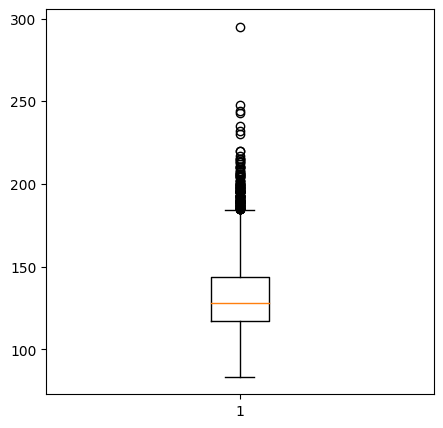

In [768]:
fig = plt.figure(figsize=(5,5))
# plt.boxplot(df2['sysBP'])
plt.boxplot(df3['sysBP'])
plt.show()

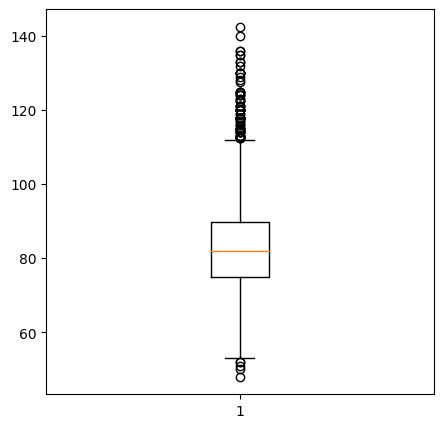

In [769]:
fig = plt.figure(figsize=(5,5))
# plt.boxplot(df2['diaBP'])
plt.boxplot(df3['diaBP'])
plt.show()

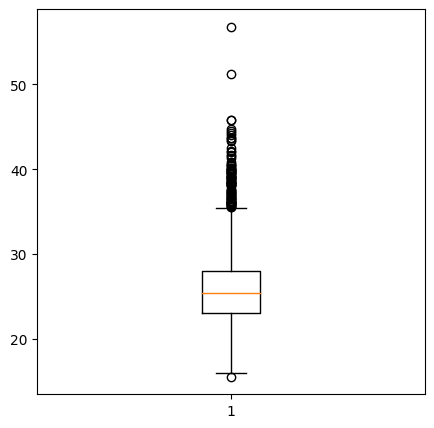

In [770]:
fig = plt.figure(figsize=(5,5))
# plt.boxplot(df2['BMI'])
plt.boxplot(df3['BMI'])
plt.show()

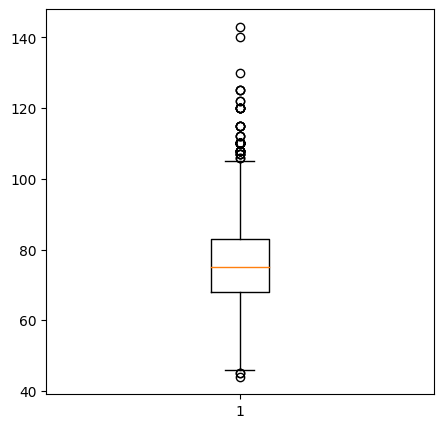

In [771]:
fig = plt.figure(figsize=(5,5))
# plt.boxplot(df2['heartRate'])
plt.boxplot(df3['heartRate'])
plt.show()

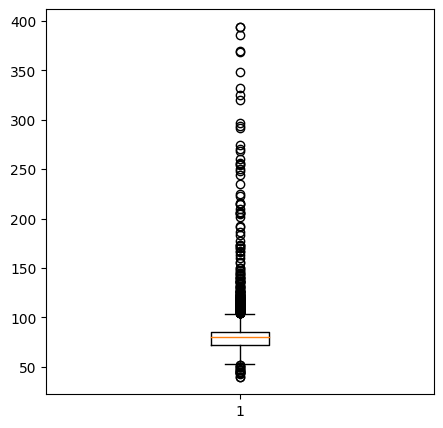

In [772]:
fig = plt.figure(figsize=(5,5))
# plt.boxplot(df2['glucose'])
plt.boxplot(df3['glucose'])
plt.show()

In [773]:
# df2['TenYearCHD'].value_counts()
df3['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

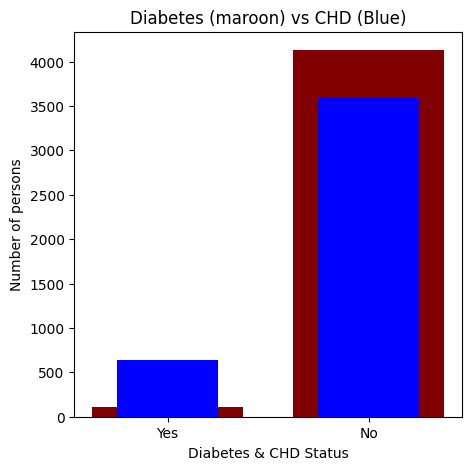

In [774]:
# chd = {'Yes': 557, 'No': 3099}
chd = {'Yes': 644, 'No': 3594}
fig = plt.figure(figsize=(5,5))
plt.bar(list(diabetes.keys()), list(diabetes.values()), color='maroon', width = 0.75)
plt.bar(list(chd.keys()), list(chd.values()), color='b', width = 0.5)

plt.xlabel("Diabetes & CHD Status")
plt.ylabel("Number of persons")
plt.title('Diabetes (maroon) vs CHD (Blue)')
plt.show()

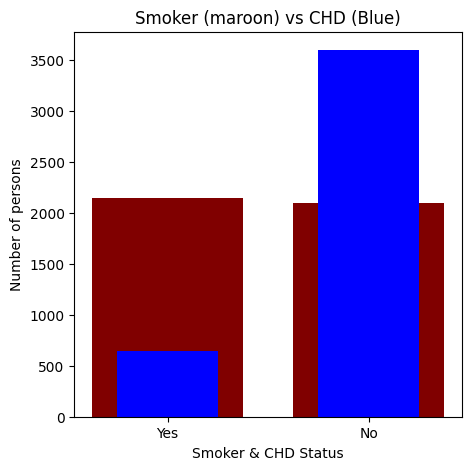

In [775]:
fig = plt.figure(figsize=(5,5))
plt.bar(list(smoker.keys()), list(smoker.values()), color='maroon', width = 0.75)
plt.bar(list(chd.keys()), list(chd.values()), color='b', width = 0.5)

plt.xlabel("Smoker & CHD Status")
plt.ylabel("Number of persons")
plt.title('Smoker (maroon) vs CHD (Blue)')
plt.show()

### Importing Sci-kit Learn Dependencies for model building and training

In [776]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### Train on DF2 (NaN Values dropped)

In [777]:
x_data = df2.drop(columns=['TenYearCHD'])
x_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [778]:
y_data = df2['TenYearCHD']
y_data.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [779]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=0)

#### Logistic Regression

In [780]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

c:\users\oshan\data science projects\heart disease prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [781]:
y_pred = logReg.predict(x_test)

[[620   3]
 [103   6]]


Text(0.5, 427.9555555555555, 'Predicted label')

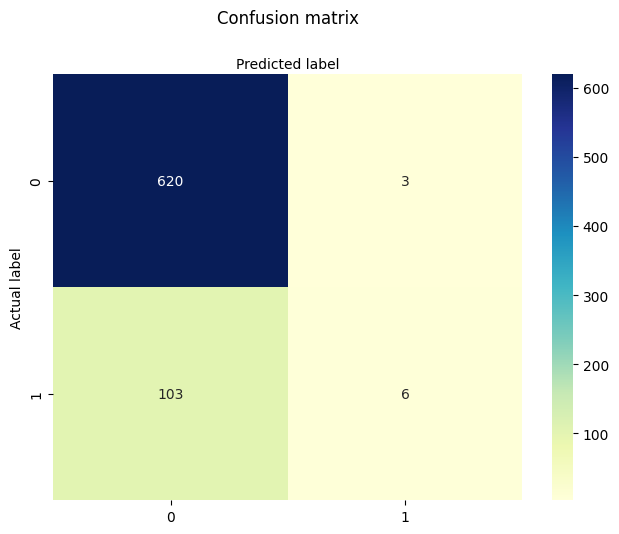

In [782]:
# Create confusion matrix for predictions

confusion_m = metrics.confusion_matrix(y_test, y_pred)
print(confusion_m)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [783]:
# Printing accuracy score, precision score, recall score, and F1 score

acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)
precision = metrics.precision_score(y_test, y_pred)
print('Precision Score:', precision)
recall = metrics.recall_score(y_test, y_pred)
print('Recall Score:', recall)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy Score: 0.855191256830601
Precision Score: 0.6666666666666666
Recall Score: 0.05504587155963303
F1 Score: 0.1016949152542373


#### Decision Tree Classifier

In [784]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

Text(0.5, 427.9555555555555, 'Predicted label')

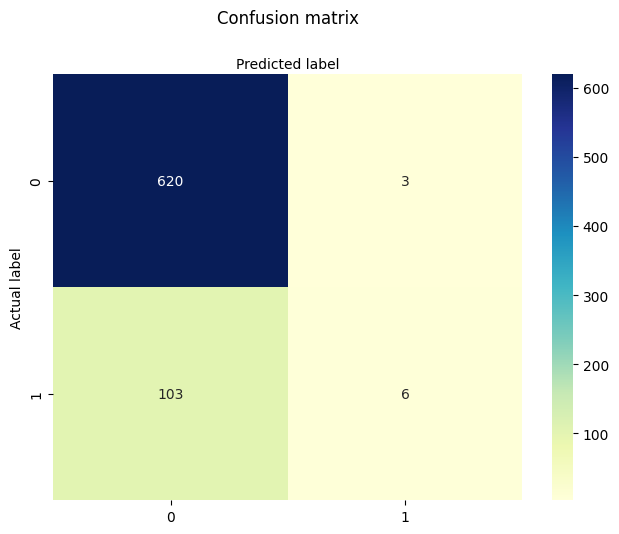

In [785]:
# Create confusion matrix for predictions

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [786]:
# Printing accuracy score, precision score, recall score, and F1 score

acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)
precision = metrics.precision_score(y_test, y_pred)
print('Precision Score:', precision)
recall = metrics.recall_score(y_test, y_pred)
print('Recall Score:', recall)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy Score: 0.7609289617486339
Precision Score: 0.24615384615384617
Recall Score: 0.29357798165137616
F1 Score: 0.26778242677824265


#### Random Forest Classifier

In [787]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

Text(0.5, 427.9555555555555, 'Predicted label')

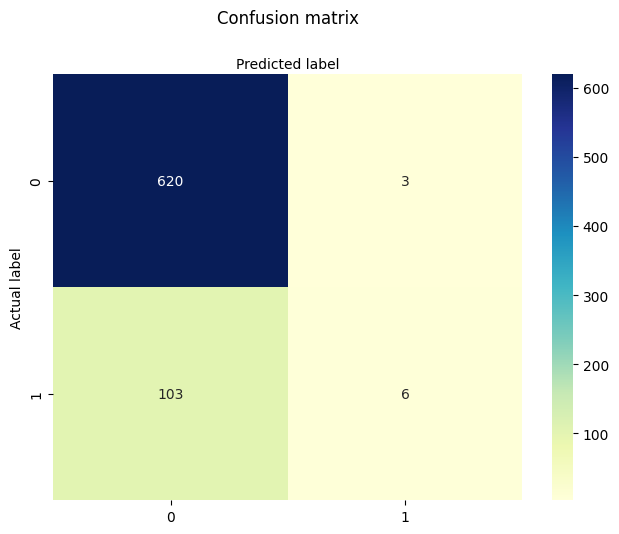

In [788]:
# Create confusion matrix for predictions

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [789]:
# Printing accuracy score, precision score, recall score, and F1 score

acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)
precision = metrics.precision_score(y_test, y_pred)
print('Precision Score:', precision)
recall = metrics.recall_score(y_test, y_pred)
print('Recall Score:', recall)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy Score: 0.8538251366120219
Precision Score: 0.625
Recall Score: 0.045871559633027525
F1 Score: 0.08547008547008549


### Train on DF3 (NaN values replaced)

In [790]:
x_data = df3.drop(columns=['TenYearCHD'])
x_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [791]:
y_data = df3['TenYearCHD']
y_data.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [792]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=0)

#### Logistic Regression

In [793]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

c:\users\oshan\data science projects\heart disease prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [794]:
y_pred = logReg.predict(x_test)

Text(0.5, 427.9555555555555, 'Predicted label')

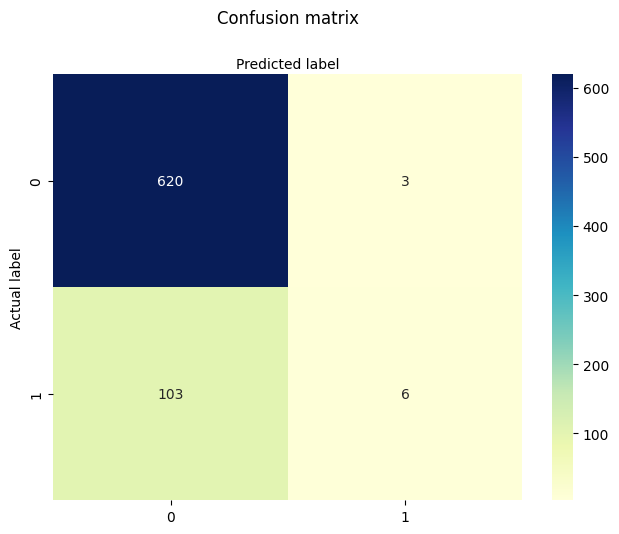

In [795]:
# Create confusion matrix for predictions

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [796]:
# Printing accuracy score, precision score, recall score, and F1 score

acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)
precision = metrics.precision_score(y_test, y_pred)
print('Precision Score:', precision)
recall = metrics.recall_score(y_test, y_pred)
print('Recall Score:', recall)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy Score: 0.8372641509433962
Precision Score: 0.5
Recall Score: 0.007246376811594203
F1 Score: 0.014285714285714285


#### Decision Tree Classifier

In [797]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

Text(0.5, 427.9555555555555, 'Predicted label')

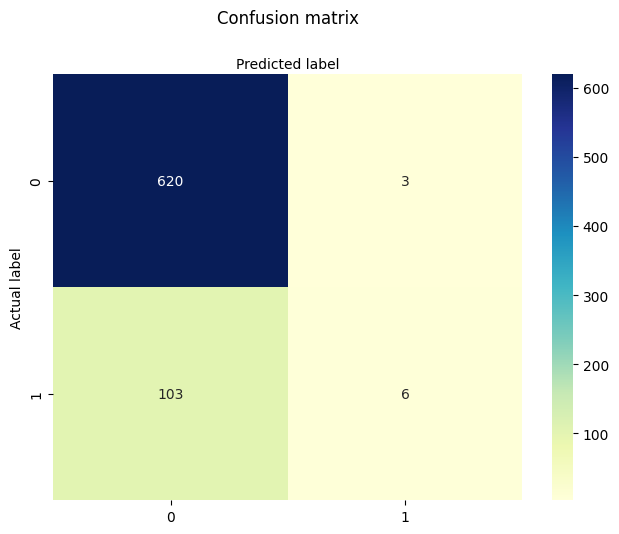

In [798]:
# Create confusion matrix for predictions

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [799]:
# Printing accuracy score, precision score, recall score, and F1 score

acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)
precision = metrics.precision_score(y_test, y_pred)
print('Precision Score:', precision)
recall = metrics.recall_score(y_test, y_pred)
print('Recall Score:', recall)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy Score: 0.7558962264150944
Precision Score: 0.271523178807947
Recall Score: 0.2971014492753623
F1 Score: 0.28373702422145325


#### Random Forest Classifier

In [800]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

Text(0.5, 427.9555555555555, 'Predicted label')

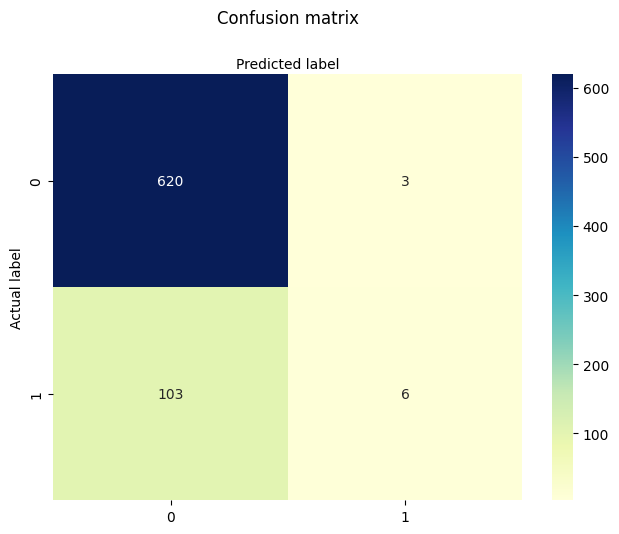

In [801]:
# Create confusion matrix for predictions

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [802]:
# Printing accuracy score, precision score, recall score, and F1 score

acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)
precision = metrics.precision_score(y_test, y_pred)
print('Precision Score:', precision)
recall = metrics.recall_score(y_test, y_pred)
print('Recall Score:', recall)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy Score: 0.8372641509433962
Precision Score: 0.5
Recall Score: 0.028985507246376812
F1 Score: 0.0547945205479452


### Issue of imbalanced dataset

In [803]:
df2.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [804]:
df2['TenYearCHD'].value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

In [805]:
from sklearn.utils import resample

##### sklearn.utils.resample(*arrays, replace=True, n_samples=None, random_state=None, stratify=None)

In [806]:
df_majority = df2[(df2['TenYearCHD']==0)]
df_minority = df2[(df2['TenYearCHD']==1)]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=3099, random_state=42)
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [807]:
df_upsampled['TenYearCHD'].value_counts()

1    3099
0    3099
Name: TenYearCHD, dtype: int64

1    3099
0    3099
Name: TenYearCHD, dtype: int64


([<matplotlib.patches.Wedge at 0x286293731c0>,
 [Text(6.735557395310444e-17, 1.1, '0-No-CHD'),
  Text(-2.0206672185931328e-16, -1.1, '1-CHD')],
 [Text(3.6739403974420595e-17, 0.6, '50.00%'),
  Text(-1.1021821192326178e-16, -0.6, '50.00%')])

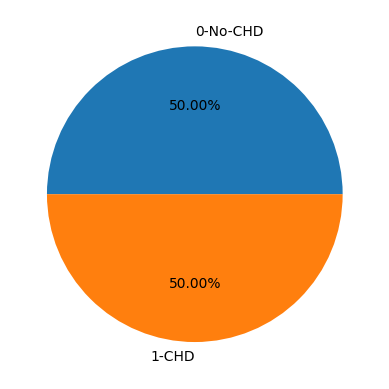

In [808]:
unique_counts = df_upsampled['TenYearCHD'].value_counts()
print(unique_counts)

plt.pie(unique_counts.tolist(), 
        labels = ['0-No-CHD','1-CHD'],
        autopct='%1.2f%%'
       )

In [809]:
x_data = df_upsampled.drop(columns=['TenYearCHD', 'currentSmoker', 'education'])
x_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
707,1,47,30.0,0.0,0,0,0,143.0,114.0,79.0,26.59,69.0,72.0
3369,1,62,40.0,0.0,0,0,0,260.0,127.5,75.0,25.35,65.0,103.0
2088,1,50,0.0,0.0,0,1,0,259.0,171.0,120.0,29.38,72.0,85.0
745,0,66,0.0,0.0,0,1,0,232.0,175.0,94.0,29.84,95.0,67.0
494,1,56,20.0,0.0,0,0,0,340.0,134.0,89.5,21.91,50.0,72.0


In [810]:
y_data = df_upsampled['TenYearCHD']
y_data.head()

707     1
3369    1
2088    1
745     1
494     1
Name: TenYearCHD, dtype: int64

In [811]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=0)

#### Logistic Regression

In [812]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

c:\users\oshan\data science projects\heart disease prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [813]:
y_pred = logReg.predict(x_test)

[[427 194]
 [203 416]]


Text(0.5, 427.9555555555555, 'Predicted label')

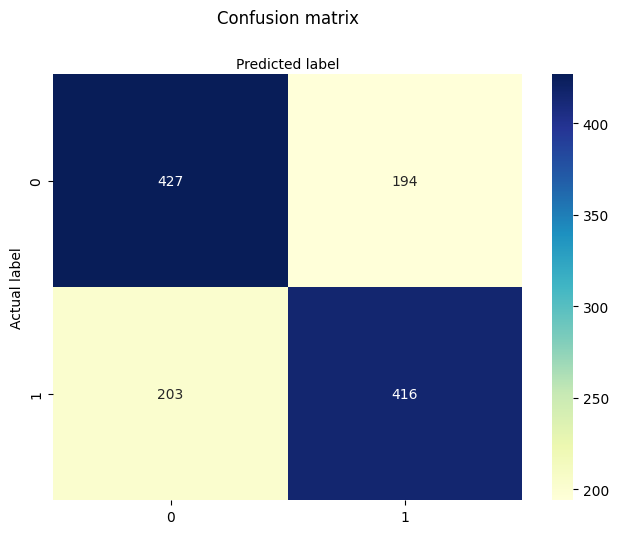

In [814]:
# Create confusion matrix for predictions

confusion_m = metrics.confusion_matrix(y_test, y_pred)
print(confusion_m)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [815]:
# Printing accuracy score, precision score, recall score, and F1 score

acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)
precision = metrics.precision_score(y_test, y_pred)
print('Precision Score:', precision)
recall = metrics.recall_score(y_test, y_pred)
print('Recall Score:', recall)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy Score: 0.6798387096774193
Precision Score: 0.6819672131147541
Recall Score: 0.6720516962843296
F1 Score: 0.676973148901546


#### Decision Tree Classifier

In [816]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

Text(0.5, 427.9555555555555, 'Predicted label')

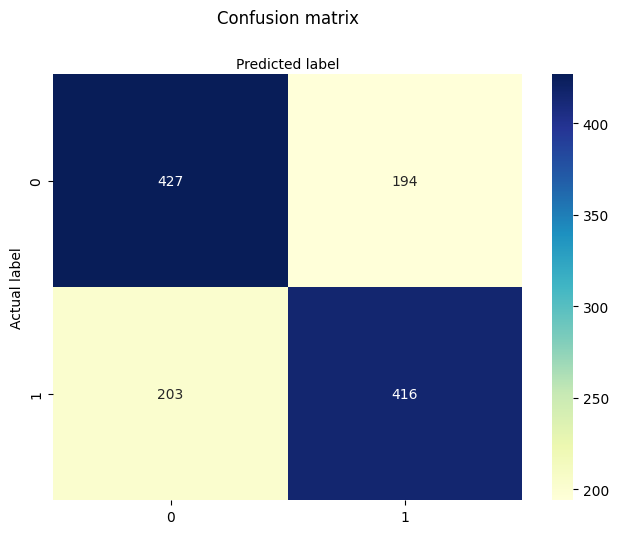

In [817]:
# Create confusion matrix for predictions

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [818]:
# Printing accuracy score, precision score, recall score, and F1 score

acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)
precision = metrics.precision_score(y_test, y_pred)
print('Precision Score:', precision)
recall = metrics.recall_score(y_test, y_pred)
print('Recall Score:', recall)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy Score: 0.9129032258064517
Precision Score: 0.8563458856345886
Recall Score: 0.9919224555735057
F1 Score: 0.9191616766467067


#### Random Forest Classifier

In [819]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

Text(0.5, 427.9555555555555, 'Predicted label')

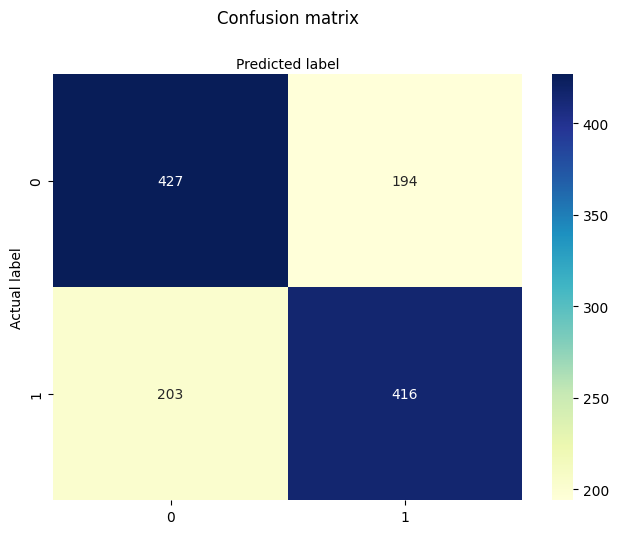

In [820]:
# Create confusion matrix for predictions

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [821]:
# Printing accuracy score, precision score, recall score, and F1 score

acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)
precision = metrics.precision_score(y_test, y_pred)
print('Precision Score:', precision)
recall = metrics.recall_score(y_test, y_pred)
print('Recall Score:', recall)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy Score: 0.9790322580645161
Precision Score: 0.9669291338582677
Recall Score: 0.9919224555735057
F1 Score: 0.9792663476874004


### Imbalance method 2

In [822]:
from imblearn.over_sampling import SMOTE

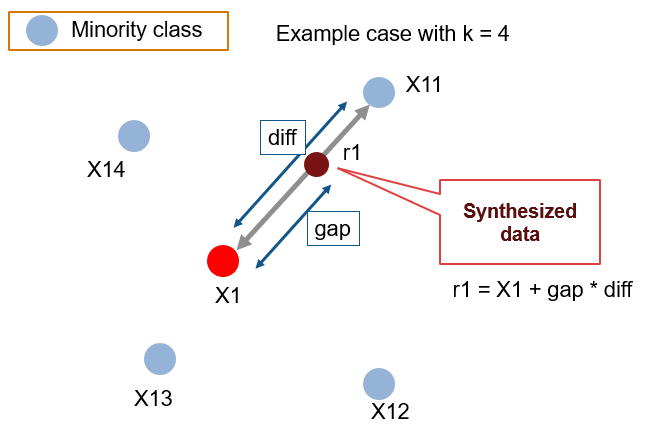

In [823]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df2.drop('TenYearCHD', axis=1), df2['TenYearCHD'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [824]:
oversampled['TenYearCHD'].value_counts()

0    3099
1    3099
Name: TenYearCHD, dtype: int64

In [825]:
x_data = oversampled.drop(columns=['TenYearCHD', 'currentSmoker', 'education'])
x_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [826]:
y_data = oversampled['TenYearCHD']
y_data.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [827]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=0)

#### Logistic Regression

In [828]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

c:\users\oshan\data science projects\heart disease prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [829]:
y_pred = logReg.predict(x_test)

[[379 225]
 [240 396]]


Text(0.5, 427.9555555555555, 'Predicted label')

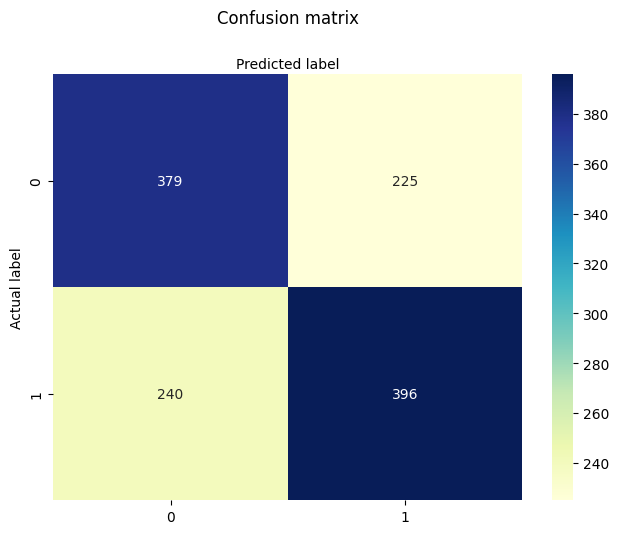

In [830]:
# Create confusion matrix for predictions

confusion_m = metrics.confusion_matrix(y_test, y_pred)
print(confusion_m)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [831]:
# Printing accuracy score, precision score, recall score, and F1 score

acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)
precision = metrics.precision_score(y_test, y_pred)
print('Precision Score:', precision)
recall = metrics.recall_score(y_test, y_pred)
print('Recall Score:', recall)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy Score: 0.625
Precision Score: 0.6376811594202898
Recall Score: 0.6226415094339622
F1 Score: 0.630071599045346


#### Decision Tree Classifier

In [832]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

Text(0.5, 427.9555555555555, 'Predicted label')

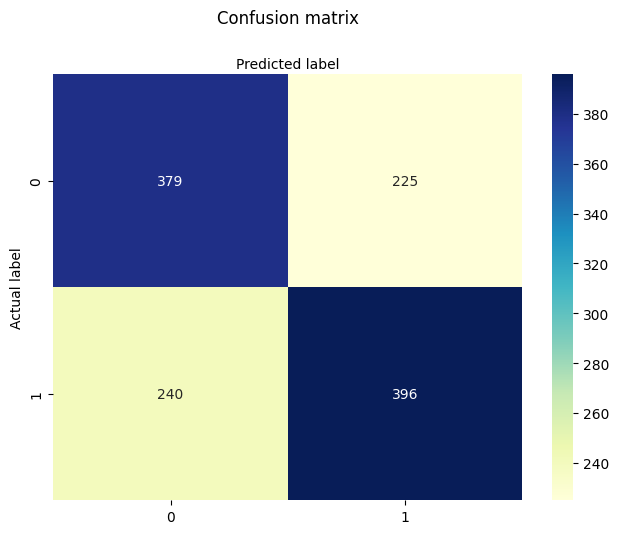

In [833]:
# Create confusion matrix for predictions

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [834]:
# Printing accuracy score, precision score, recall score, and F1 score

acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)
precision = metrics.precision_score(y_test, y_pred)
print('Precision Score:', precision)
recall = metrics.recall_score(y_test, y_pred)
print('Recall Score:', recall)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy Score: 0.7564516129032258
Precision Score: 0.7676282051282052
Recall Score: 0.7531446540880503
F1 Score: 0.7603174603174603


#### Random Forest Classifier

In [835]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

Text(0.5, 427.9555555555555, 'Predicted label')

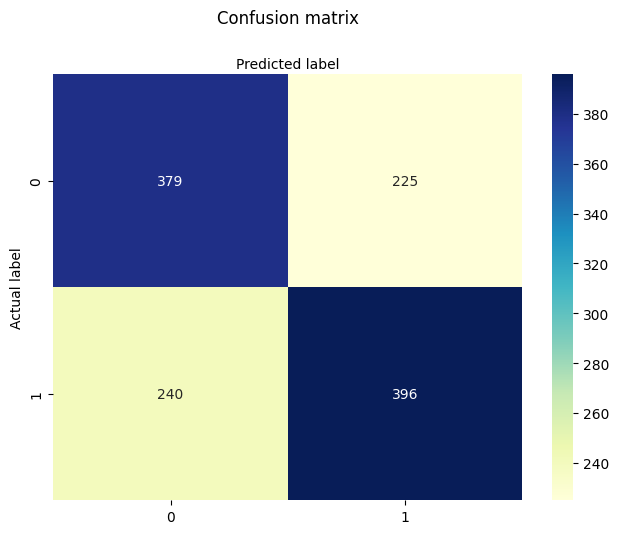

In [836]:
# Create confusion matrix for predictions

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [837]:
# Printing accuracy score, precision score, recall score, and F1 score

acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)
precision = metrics.precision_score(y_test, y_pred)
print('Precision Score:', precision)
recall = metrics.recall_score(y_test, y_pred)
print('Recall Score:', recall)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy Score: 0.8766129032258064
Precision Score: 0.8620689655172413
Recall Score: 0.9040880503144654
F1 Score: 0.8825786646201074


## Conclusion

    In this notebook, you saw a use case of Supervised Machine Learning for detecting future chronic heart diseases given a patient's medical history. We utilized a few different methodologies in our EDA to prepare and tune our dataset to fit our problem and to obtain the best results possible. Our most accurate model came from dropping all NaN values from our dataset, the utilizing Sci-kit Learn's 'resample' utility method to fix the issue of the imbalanced dataset, and training a Random Forest Classifier model yielding an F1 score of 97.62%. Our original model, before tuning the dataset, resulted in an F1 score of 11.38%. Our resampling methodologies have improved our model accuracy by over 86%. Further analysis to find the most optimal and correlated features can possibly provide an even greater boost to our model accuracy. This utilization of Supervised Machine Learning is promising for providing health professionals with more advanced technologies to assist with providing the best possible care for their patients.